In [ ]:
# Author: Julia B. 
# Comment: similar to other ones comitted to the github

In [1]:
# --- Import and Initialization ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image as im

url = "PIV.dat"


In [2]:

# --- Read the PIV data ---

data = pd.read_csv(url)
#print(data)

xc = np.array(data["x/c (395 elements)"])
yc = np.array(data["y/c (57 elements)"])
uu = np.array(data["u/U_inf"])
vu = np.array(data["v/U_inf"])

# xc, yc: normalized position vectors [0,1]
# uu, vu: normalized velocity vectors [0,1]


In [10]:

# --- Reduce data ----

x_red, y_red, u_red, v_red = np.empty([]), np.empty([]), np.empty([]), np.empty([])

# Need to reduce the data so that it's a little clearer to see the velocity arrows
for i in range(len(xc)): #ty person who wrote this :D
    if i % 20 == 0:
        x_red = np.append(x_red, xc[i])
        y_red = np.append(y_red, yc[i])
        u_red = np.append(u_red, uu[i])
        v_red = np.append(v_red, vu[i])

# dont mind me being efficient, im too lazy to think of another way to do this
x_red = x_red[1:]
y_red = y_red[1:]
u_red = u_red[1:]
v_red = v_red[1:]

# Find absolute velocity data
absv = uu**2 + vu**2


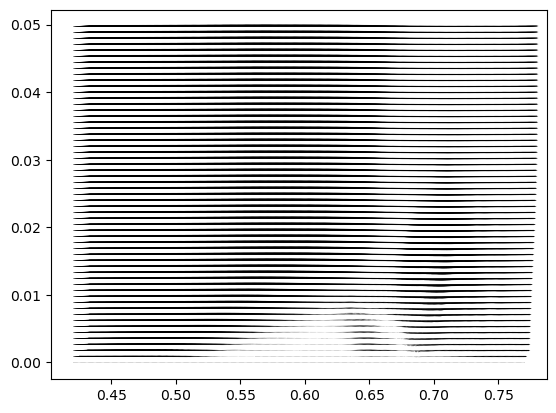

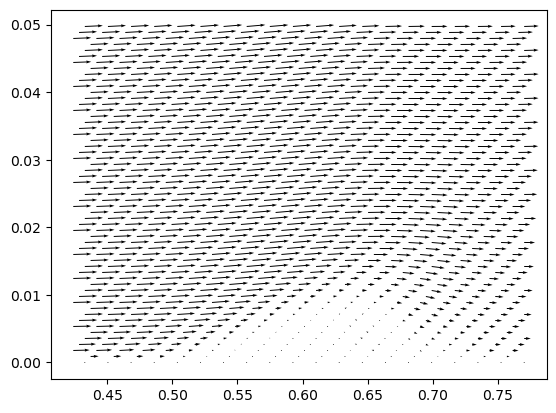

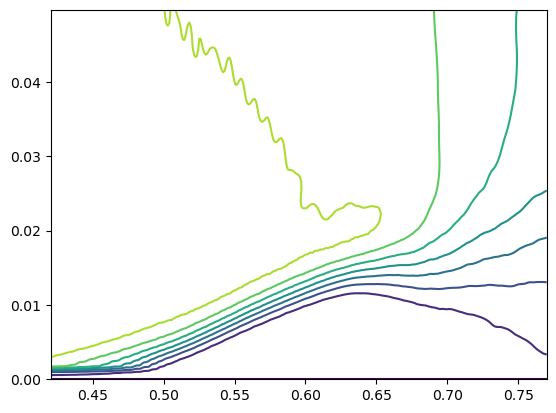

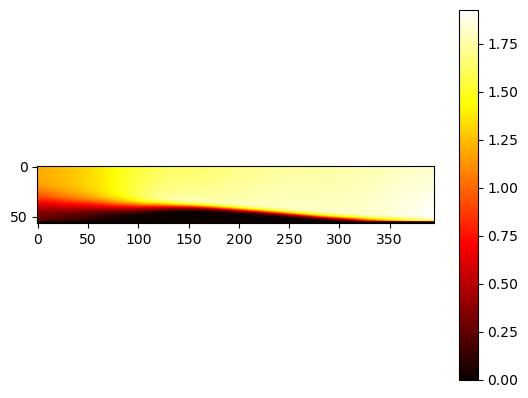

In [12]:

# --- plot ---

# Normal plot
fig = plt.subplots()
plt.quiver(xc, yc, uu, vu, scale=100, scale_units="xy", width=0.001)

# Velocity plot quiver
fig = plt.subplots()
plt.quiver(x_red, y_red, u_red, v_red, scale=100, scale_units="xy", width=0.002)


# Velocity plot contour
fig = plt.subplots()
contourplot = plt.contour(xc.reshape(57, 395),  yc.reshape(57, 395), absv.reshape(57, 395))

# Color plot
fig = plt.subplots()
heatmap = plt.imshow(absv.reshape((57,395)), cmap='hot', interpolation='nearest')
plt.colorbar()
